# This a Capstone Project from Google Data Analytics Certificate by Coursera
# Last updated: 02/19/2023

## Background
### Scenario
You are a junior data analyst working in the marketing analyst team at Cyclistic, a bike-share company in Chicago. The director of marketing believes the company’s future success depends on maximizing the number of annual memberships. Therefore, your team wants to understand how casual riders and annual members use Cyclistic bikes differently. From these insights, your team will design a new marketing strategy to convert casual riders into annual members. But first, Cyclistic executives must approve your recommendations, so they must be backed up with compelling data insights and professional data visualizations.

### Major stakeholders
- Lily Moreno: The director of marketing and your manager. Moreno is responsible for the development of campaigns and initiatives to promote the bike-share program. These may include email, social media, and other channels.
- Cyclistic marketing analytics team: A team of data analysts who are responsible for collecting, analyzing, and reporting data that helps guide Cyclistic marketing strategy. You joined this team six months ago and have been busy learning about Cyclistic’s mission and business goals — as well as how you, as a junior data analyst, can help Cyclistic achieve them.
- Cyclistic executive team: The notoriously detail-oriented executive team will decide whether to approve the recommended marketing program.

### About the company
Cylistic is a bike-share program that features more than 5,800 bicycles and 600 docking stations. Cyclistic sets itself apart by also offering reclining bikes, hand tricycles, and cargo bikes, making bike-share more inclusive to people with disabilities and riders who can’t use a standard two-wheeled bike. The majority of riders opt for traditional bikes; about 8% of riders use the assistive options. Cyclistic users are more likely to ride for leisure, but about 30% use them to commute to work each day.

Cyclistic’s marketing strategy relied on building general awareness and appealing to broad consumer segments. One approach that helped make these things possible was the flexibility of its pricing plans: single-ride passes, full-day passes, and annual memberships. 

Customers who purchase single-ride or full-day passes are referred to as casual riders. 

Customers who purchase annual memberships are Cyclistic members.

### Aim of the project
- Maximizing the number of annual members by converting current casual users to members.


### Questions lead to the aim:
Three questions will guide the future marketing program:
1. How do annual members and casual riders use Cyclistic bikes differently?
2. Why would casual riders buy Cyclistic annual memberships?
3. How can Cyclistic use digital media to influence casual riders to become members?

In [1]:
# Step 1: Import modules

import os
import glob
import pandas as pd
import numpy as np
from datetime import datetime

#list all csv files only

path = "/Users/clementcheng/Documents/Google/Capstone Project (Cyclistic)_Dataset"
files = glob.glob(path + '/*.csv')

# create empty list to store dataframes

dflist = []

# loop through list of files and read each one into a dataframe and append to list

for f in files:
    # read in csv
    temp_df = pd.read_csv(f)
    # append df to list
    dflist.append(temp_df)
    

# Concatenate our list of dataframes into one!

df = pd.concat(dflist, axis=0)

df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,550CF7EFEAE0C618,electric_bike,2022-08-07 21:34:15,2022-08-07 21:41:46,NaN,NaN,NaN,NaN,41.93,-87.69,41.94,-87.72,casual
1,DAD198F405F9C5F5,electric_bike,2022-08-08 14:39:21,2022-08-08 14:53:23,NaN,NaN,NaN,NaN,41.89,-87.64,41.92,-87.64,casual
2,E6F2BC47B65CB7FD,electric_bike,2022-08-08 15:29:50,2022-08-08 15:40:34,NaN,NaN,NaN,NaN,41.97,-87.69,41.97,-87.66,casual
3,F597830181C2E13C,electric_bike,2022-08-08 02:43:50,2022-08-08 02:58:53,NaN,NaN,NaN,NaN,41.94,-87.65,41.97,-87.69,casual
4,0CE689BB4E313E8D,electric_bike,2022-08-07 20:24:06,2022-08-07 20:29:58,NaN,NaN,NaN,NaN,41.85,-87.65,41.84,-87.66,casual


In [2]:
# Preview the data 

df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5667717 entries, 0 to 701338
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 605.4+ MB


,start_lat,start_lng,end_lat,end_lng
count,5.667717e+06,5.667717e+06,5.661859e+06,5.661859e+06
mean,4.190222e+01,-8.764783e+01,4.190242e+01,-8.764790e+01
std,4.626109e-02,2.999925e-02,6.805821e-02,1.082985e-01
min,4.164000e+01,-8.784000e+01,0.000000e+00,-8.814000e+01
25%,4.188103e+01,-8.766154e+01,4.188103e+01,-8.766260e+01
50%,4.190000e+01,-8.764410e+01,4.190000e+01,-8.764414e+01
75%,4.193000e+01,-8.762957e+01,4.193000e+01,-8.762963e+01
max,4.563503e+01,-7.379648e+01,4.237000e+01,0.000000e+00


In [3]:
# Step 2: Prepare data

# Change data type (From object to datetime)

df['started_at'] = pd.to_datetime(df['started_at'])

df['ended_at'] = pd.to_datetime(df['ended_at'])

In [4]:
# Extract month data

df['month'] = df['started_at'].dt.month

# Adding weekday column

df['Weekday'] = df['started_at'].dt.day_name().str[:3]

In [5]:
# Extract time 

df['Start_time'] = df['started_at'].dt.strftime("%H:%M:%S")

df['End_time'] = df['ended_at'].dt.strftime("%H:%M:%S")

In [6]:
# Change data format for further calculation

df['Start_time'] = pd.to_datetime(df['Start_time'])

df['End_time'] = pd.to_datetime(df['End_time'])

In [7]:
# Calculate the ride time in minute

df['Ride_Minute'] = df['End_time'] - df['Start_time']

df['Ride_Minute'] = df['Ride_Minute'].dt.total_seconds() / 60

df.head()

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5667717 entries, 0 to 701338
Data columns (total 18 columns):
 #   Column              Dtype         
---  ------              -----         
 0   ride_id             object        
 1   rideable_type       object        
 2   started_at          datetime64[ns]
 3   ended_at            datetime64[ns]
 4   start_station_name  object        
 5   start_station_id    object        
 6   end_station_name    object        
 7   end_station_id      object        
 8   start_lat           float64       
 9   start_lng           float64       
 10  end_lat             float64       
 11  end_lng             float64       
 12  member_casual       object        
 13  month               int64         
 14  Weekday             object        
 15  Start_time          datetime64[ns]
 16  End_time            datetime64[ns]
 17  Ride_Minute         float64       
dtypes: datetime64[ns](4), float64(5), int64(1), object(8)
memory usage: 821.6+ MB


In [8]:
# Step 3: Process Data (Missing data / Duplicates)

df = df.drop_duplicates()

df = df.dropna()


In [9]:
# Step 4: Analyze the data

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

### What I want to find in the data

1. Monthly Trend of Ride Users
2. Bike type distribution in Members and Casual Users
3. Average Riding time
4. Using Trend by Weekday

In [10]:
# 1) Monthly trend for different type of user

#    Get monthly data first

df.groupby(['member_casual'])['month'].value_counts().sort_index()

member_casual  month
casual         1         12605
               2         15144
               3         67156
               4         91897
               5        220246
               6        292068
               7        311678
               8        270095
               9        220915
               10       151324
               11        73556
               12        31505
member         1         67523
               2         74034
               3        148827
               4        180663
               5        282299
               6        328282
               7        331002
               8        335230
               9        314230
               10       262945
               11       182238
               12       103898
Name: month, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

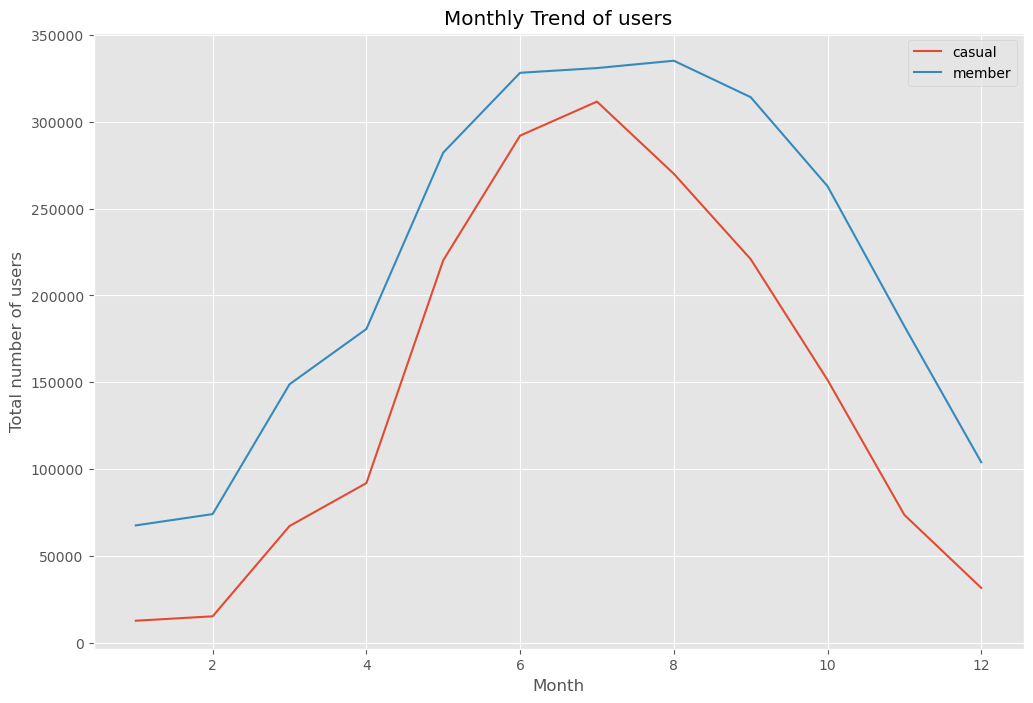

In [11]:
# Use the above data to make a line chart

month = [1,2,3,4,5,6,7,8,9,10,11,12]
casual = [12605, 15144, 67156, 91897, 220246, 292068, 311678, 270095, 220915, 151324, 73556, 31505]
member = [67523, 74034, 148827, 180663, 282299, 328282, 331002, 335230, 314230, 262945, 182238, 103898]

plt.plot(month, casual, label='casual')
plt.plot(month, member, label='member')
plt.title('Monthly Trend of users')
plt.xlabel('Month')
plt.ylabel('Total number of users')
plt.legend()
plt.show

### Findings 1:
- Both member and casual users shared a similiar trend 
1. The highest number of user was found in summer holiday period (June - August)
2. The lowest number of user was found in winter period (Dec - February)


In [12]:
df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,month,Weekday,Start_time,End_time,Ride_Minute
142,241C440C74CB31BB,classic_bike,2022-08-05 16:13:36,2022-08-05 16:22:40,DuSable Museum,KA1503000075,Cottage Grove Ave & 51st St,TA1309000067,41.791568,-87.607852,41.803038,-87.606615,casual,8,Fri,2023-02-21 16:13:36,2023-02-21 16:22:40,9.066667
271,53A7590B28ED25E2,classic_bike,2022-08-11 23:30:11,2022-08-11 23:30:56,California Ave & Milwaukee Ave,13084,California Ave & Milwaukee Ave,13084,41.922695,-87.697153,41.922695,-87.697153,casual,8,Thu,2023-02-21 23:30:11,2023-02-21 23:30:56,0.750000
329,C34EE790A58C0434,classic_bike,2022-08-21 14:09:08,2022-08-21 15:10:46,California Ave & Division St,13256,California Ave & Division St,13256,41.903029,-87.697474,41.903029,-87.697474,casual,8,Sun,2023-02-21 14:09:08,2023-02-21 15:10:46,61.633333
357,49259B4BA064D81B,electric_bike,2022-08-21 16:15:12,2022-08-21 16:29:30,Wood St & Chicago Ave,637,Wood St & Chicago Ave,637,41.895673,-87.672075,41.895634,-87.672069,casual,8,Sun,2023-02-21 16:15:12,2023-02-21 16:29:30,14.300000
422,BEE91D557E47FE83,classic_bike,2022-08-21 02:11:26,2022-08-21 03:44:04,California Ave & Milwaukee Ave,13084,California Ave & Milwaukee Ave,13084,41.922695,-87.697153,41.922695,-87.697153,casual,8,Sun,2023-02-21 02:11:26,2023-02-21 03:44:04,92.633333


In [13]:
# 2) Bike Type Distribution in Casuals and Members

#    Type of rideable for casuals

casual = df[df['member_casual'].isin(['casual'])]

casual = casual.groupby(['member_casual'])['rideable_type'].value_counts().sort_index()

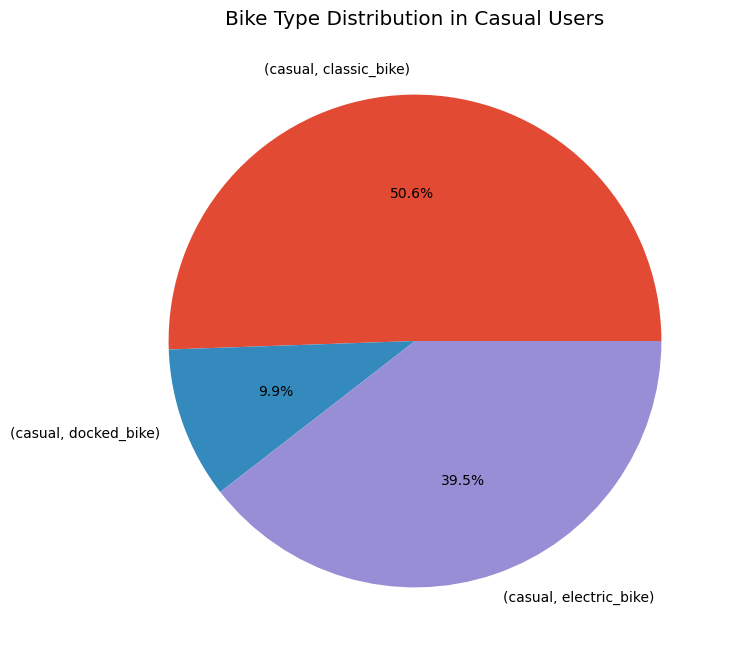

In [14]:
casual.plot(kind='pie', title='Bike Type Distribution in Casual Users', ylabel='', autopct='%1.1f%%')
plt.show()

In [15]:
#    Type of rideable for members

member = df[df['member_casual'].isin(['member'])]

member = member.groupby(['member_casual'])['rideable_type'].value_counts().sort_index()

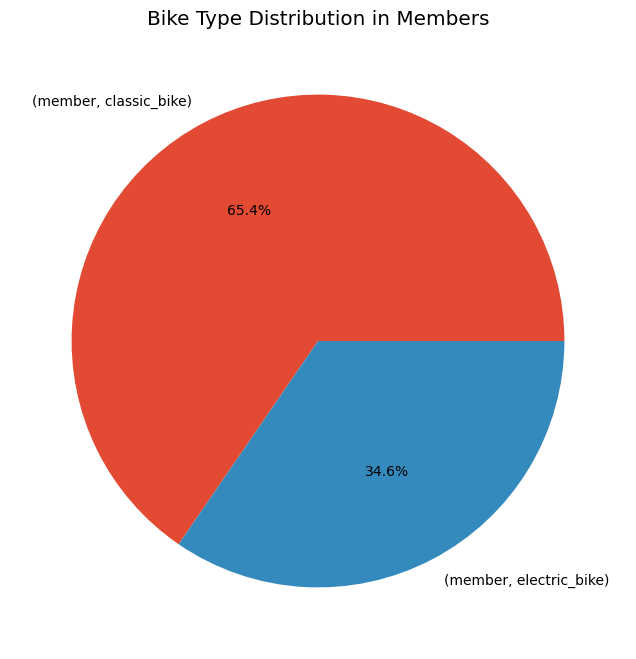

In [16]:
member.plot(kind='pie', title='Bike Type Distribution in Members', ylabel='', autopct='%1.1f%%')
plt.show()

### Findings 2:
- Over 50% usage rate was found in both members and casual users.
- Casual users have higher usage rate in electric bike (39.5% vs. 34.6%)
- Casual users have used an extra ride type (docked bike) than members

In [17]:
# 3) Observe the riding time in members and casual users

df.head()

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual,month,Weekday,Start_time,End_time,Ride_Minute
142,241C440C74CB31BB,classic_bike,2022-08-05 16:13:36,2022-08-05 16:22:40,DuSable Museum,KA1503000075,Cottage Grove Ave & 51st St,TA1309000067,41.791568,-87.607852,41.803038,-87.606615,casual,8,Fri,2023-02-21 16:13:36,2023-02-21 16:22:40,9.066667
271,53A7590B28ED25E2,classic_bike,2022-08-11 23:30:11,2022-08-11 23:30:56,California Ave & Milwaukee Ave,13084,California Ave & Milwaukee Ave,13084,41.922695,-87.697153,41.922695,-87.697153,casual,8,Thu,2023-02-21 23:30:11,2023-02-21 23:30:56,0.750000
329,C34EE790A58C0434,classic_bike,2022-08-21 14:09:08,2022-08-21 15:10:46,California Ave & Division St,13256,California Ave & Division St,13256,41.903029,-87.697474,41.903029,-87.697474,casual,8,Sun,2023-02-21 14:09:08,2023-02-21 15:10:46,61.633333
357,49259B4BA064D81B,electric_bike,2022-08-21 16:15:12,2022-08-21 16:29:30,Wood St & Chicago Ave,637,Wood St & Chicago Ave,637,41.895673,-87.672075,41.895634,-87.672069,casual,8,Sun,2023-02-21 16:15:12,2023-02-21 16:29:30,14.300000
422,BEE91D557E47FE83,classic_bike,2022-08-21 02:11:26,2022-08-21 03:44:04,California Ave & Milwaukee Ave,13084,California Ave & Milwaukee Ave,13084,41.922695,-87.697153,41.922695,-87.697153,casual,8,Sun,2023-02-21 02:11:26,2023-02-21 03:44:04,92.633333


In [18]:
# Overall Mean Riding Minutes

df['Ride_Minute'].mean()

9.776464550872433

In [19]:
# Mean Riding Minutes in Members

member_mean = df[df['member_casual'].isin(['member'])]

member_mean['Ride_Minute'].mean()

8.472370512438555

In [20]:
# Mean Riding Minutes in Casual Users

casual_mean = df[df['member_casual'].isin(['casual'])]

casual_mean['Ride_Minute'].mean()

11.713237295117928

### Findings 3:

- Casual Users has a longer average riding time than members (11.7 mins vs. 8.4. mins)

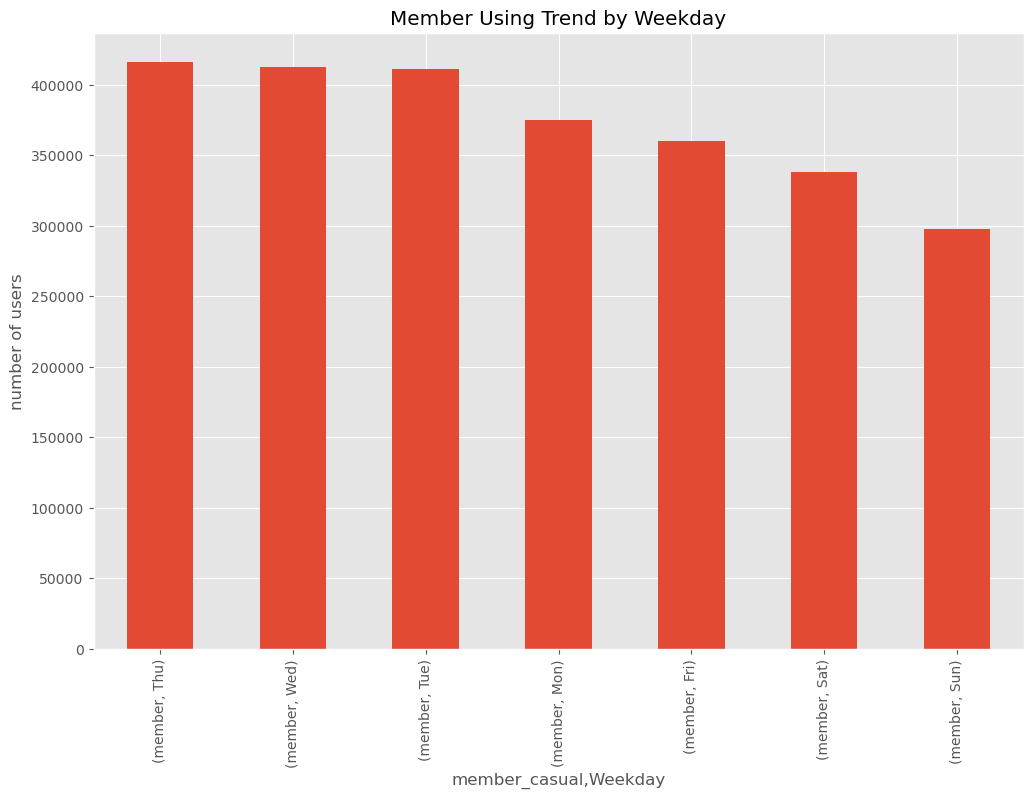

In [21]:
# 4) Using Trend by Weekday

# Member Using Trend by Weekday

Weekday_m = df[df['member_casual'].isin(['member'])]

Weekday_m.groupby(['member_casual'])['Weekday'].value_counts()

Weekday_m = Weekday_m.groupby(['member_casual'])['Weekday'].value_counts()

Weekday_m.plot(kind='bar', title='Member Using Trend by Weekday', ylabel='number of users')
plt.show()

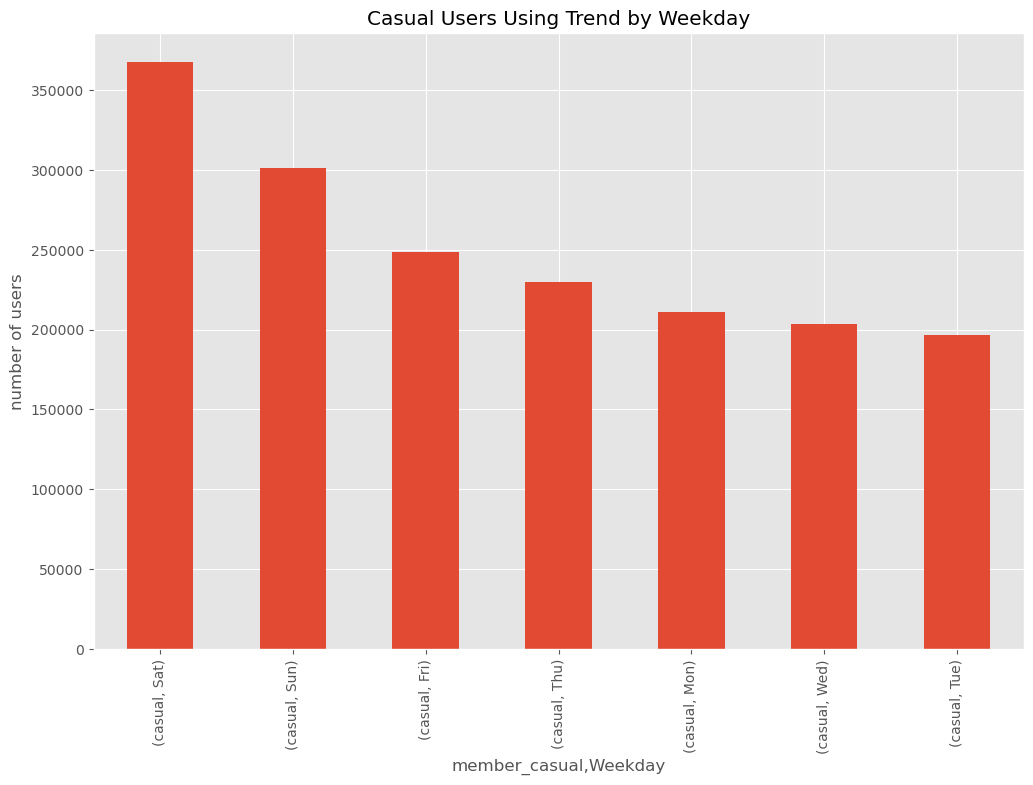

In [22]:
# Casual Users Using Trend by Weekday

Weekday_c = df[df['member_casual'].isin(['casual'])]

Weekday_c = Weekday_c.groupby(['member_casual'])['Weekday'].value_counts()

Weekday_c.plot(kind='bar', title='Casual Users Using Trend by Weekday', ylabel='number of users')
plt.show()

### Finding 4

- Most active days were found in Thursday, Wednesday, and Tuesday for members

- Most active days were found in Weekends for casual users

### Wrap it up!
- Casual users tend to join cyclistic program in weekends, as they use the bike as entertainment, having fun with friends in weekends, therefore, casual users have low usage rate in weekdays.
- Members tend to use bike as their commute transports, therefore their riding time will lesser than casual users and the bike usage rate was quite similar. 

Based on the findings, we suggest using digital marketing like Instagram or YouTube to promote the membership program, how environmental and financial friendly it is to the users. As the environment friendly concepts arise in the last decade, the people aware of how their living style affect the environment and how it will affect themselves, so adding environmental friendly elements in the advertisement will help casual users to take more bikes than public transport. 

When they use the bike more, they will compare the price and benefits from full-day pass and membership, considering price, they will subscribe to the annual membership.



### Thanks you for reading my first case study in Python.